In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
# %config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import sys
modsim_path = !echo $(pwd)/..
sys.path.insert(0, modsim_path[0])

# import functions from the modsim.py module
from modsim import *

In [2]:
init = State(x=1, y=1)
system = System(init = init, alpha = 0.05, beta = 0.1, gamma = 0.1, delta = 0.1, t0 = 0, t_end = 2000, dt = 0.1)

In [3]:
def update_func(state, dt, system):
    """Update the Lotka-Volterra model.
    
    state: State (x, y)
    t: time
    system: System object
    
    returns: State (lotka-volterra)
    """
    X, Y = state
    unpack(system)

    dx_dt = X * (system.alpha - system.beta * Y)
    dy_dt = Y * (system.delta * X - system.gamma)
    
    x = X + dx_dt*dt
    y = Y + dy_dt*dt
    
    return State(x = x, y = y)

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    timesteps = pd.Series(np.linspace(system.t0, system.t_end, int(system.t_end/system.dt)))
    
    for t in timesteps.index[:-1]:
        frame.row[timesteps[t+1]] = update_func(frame.row[timesteps[t]], system.dt, system)
    
    return frame

In [5]:
res = run_simulation(system, update_func)

Text(0.5,1,'Lotka-Volterra Model of Elk and Wolf Populations')

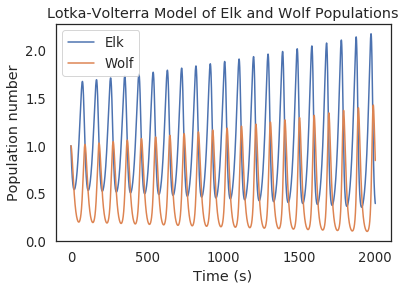

In [6]:
res.x.plot()
res.y.plot()
plt.xlabel('Time (s)')
plt.ylabel('Population number')
plt.legend(['Elk', 'Wolf'])
plt.title('Lotka-Volterra Model of Elk and Wolf Populations')